In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
data2 = 'TB_T_RSPOP_ADMI.txt'

living_people = pd.read_csv(data2, engine='python', encoding='utf-8', sep='|', quotechar='`')
living_people.head(10)

,STD_YM,ADMI_CD,ADMI_NM,SEXDSTN_CD,AGRDE_CD,RSPOP_CNT,CTY_NM
0,201807,11230660,장안2동,1,0004,667,동대문구
1,201807,11590660,대방동,1,0004,599,동작구
2,201807,11170700,보광동,1,0004,156,용산구
3,201807,11290525,성북동,1,0004,210,성북구
4,201807,11620585,낙성대동,1,0004,228,관악구
5,201807,11710670,잠실2동,1,0004,828,송파구
6,201807,11530770,오류1동,1,0004,412,구로구
7,201807,11350720,상계10동,1,0004,319,노원구
8,201807,11500604,가양2동,1,0004,169,강서구
9,201807,11290725,월곡2동,1,0004,349,성북구


In [34]:
living_people.tail(10)

,STD_YM,ADMI_CD,ADMI_NM,SEXDSTN_CD,AGRDE_CD,RSPOP_CNT,CTY_NM
2436952,202310,11200570,행당2동,2,I00,4,성동구
2436953,202310,11500620,공항동,2,I00,2,강서구
2436954,202310,11620685,신사동,2,I00,2,관악구
2436955,202310,11680670,개포2동,2,I00,1,강남구
2436956,202310,11215710,화양동,2,I00,2,광진구
2436957,202310,11530530,구로2동,2,I00,3,구로구
2436958,202310,11215810,광장동,2,I00,2,광진구
2436959,202310,11530540,구로3동,2,I00,1,구로구
2436960,202310,11560535,영등포동,2,I00,2,영등포구
2436961,202310,11320521,도봉1동,2,I00,5,도봉구


In [39]:
living_people_filtered = living_people[living_people['STD_YM'] == 202310]
living_people_filtered

,STD_YM,ADMI_CD,ADMI_NM,SEXDSTN_CD,AGRDE_CD,RSPOP_CNT,CTY_NM
2419238,202310,11545670,시흥1동,1,0004,299,금천구
2419239,202310,11200580,응봉동,1,0004,216,성동구
2419240,202310,11230570,전농2동,1,0004,200,동대문구
2419241,202310,11350700,상계8동,1,0004,501,노원구
2419242,202310,11680580,삼성1동,1,0004,126,강남구
...,...,...,...,...,...,...,...
2436957,202310,11530530,구로2동,2,I00,3,구로구
2436958,202310,11215810,광장동,2,I00,2,광진구
2436959,202310,11530540,구로3동,2,I00,1,구로구
2436960,202310,11560535,영등포동,2,I00,2,영등포구


In [40]:
gu_total = living_people_filtered.groupby('CTY_NM')['RSPOP_CNT'].sum().reset_index()
gu_total

,CTY_NM,RSPOP_CNT
0,강남구,524645
1,강동구,407216
2,강북구,289372
3,강서구,563663
4,관악구,483959
5,광진구,336294
6,구로구,377096
7,금천구,228274
8,노원구,499553
9,도봉구,307470


In [60]:
gu_total_sorted = gu_total.sort_values(by='RSPOP_CNT', ascending=False).reset_index(drop=True)
gu_total_sorted

,CTY_NM,RSPOP_CNT
0,송파구,655300
1,강서구,563663
2,강남구,524645
3,노원구,499553
4,관악구,483959
5,은평구,467124
6,양천구,437199
7,성북구,426892
8,서초구,407788
9,강동구,407216


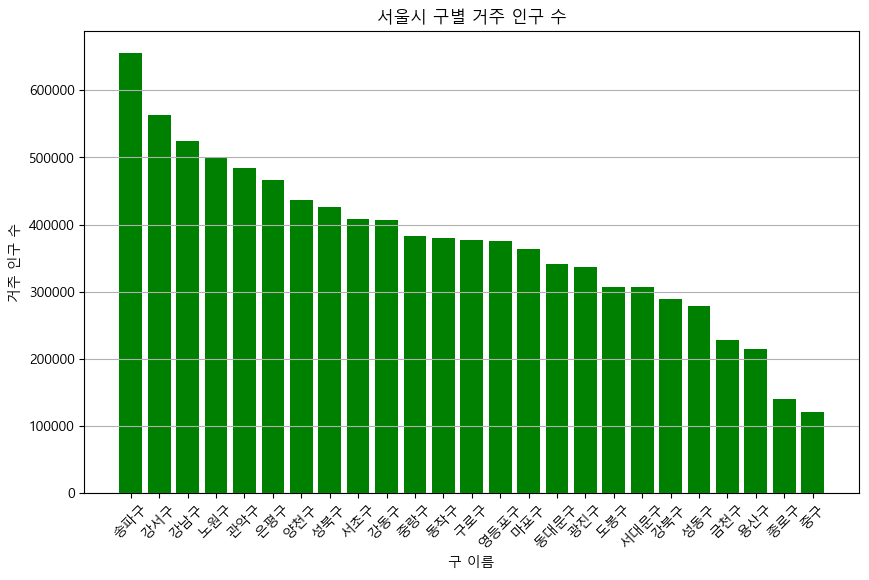

In [62]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(10, 6))
plt.bar(gu_total_sorted['CTY_NM'], gu_total_sorted['RSPOP_CNT'], color='green')
plt.title('서울시 구별 거주 인구 수')
plt.xlabel('구 이름')
plt.ylabel('거주 인구 수')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()